In [1]:
import numpy as np
import pytreenet as ptn
from copy import deepcopy
np.random.seed(2)

In [2]:
def save_list(list_to_save, filename):
    filename = f"results/{filename}"
    with open(filename, 'w') as file:
        for item in list_to_save:
            file.write(str(item) + '\n')
    print(f"List saved to {filename}")

def load_list(filename):
    filename = f"results/{filename}"
    try:
        with open(filename, 'r') as file:
            return [complex(line.strip()) for line in file.readlines()]
    except FileNotFoundError:
        print(f"File {filename} not found.")
        return []

In [3]:
def product_state(ttn, bond_dim=2):
    product_state = deepcopy(ttn)
    A = np.asarray([0,1j])
    for node_id in product_state.nodes.keys():
        n = product_state.tensors[node_id].ndim - 1
        tensor = A.reshape((1,) * n + (2,))
        T = np.pad(tensor, n*((0, bond_dim-1),) + ((0, 0),))
        product_state.tensors[node_id] = T
        product_state.nodes[node_id].link_tensor(T)  
    return product_state


In [4]:
shapes = {
    (0, 0): (2, 2, 2, 2),
    (0, 1): (2, 2, 2, 2),
    (0, 2): (2, 2, 2, 2),
    (0, 3): (2, 2),
    (1, 0): (2, 2, 2),
    (1, 1): (2, 2),
    (1, 2): (2, 2, 2),
    (1, 3): (2, 2),
    (2, 0): (2, 2, 2, 2),
    (2, 1): (2, 2, 2),
    (2, 2): (2, 2, 2),
    (2, 3): (2, 2),
    (3, 0): (2, 2),
    (3, 1): (2, 2, 2),
    (3, 2): (2, 2, 2, 2),
    (3, 3): (2, 2)
}


sites = {
    (i, j): ptn.random_tensor_node(shapes[(i, j)], identifier=f"Site({i},{j})") for i in range(4) for j in range(4)
}

ttn = ptn.TreeTensorNetworkState()

ttn.add_root(sites[(0, 0)][0], sites[(0, 0)][1])

connections = [
    ((0, 0), (0, 1), 0, 0),
    ((0, 1), (1, 1), 1, 0),
    ((0, 1), (0, 2), 2, 0),
    ((0, 2), (1, 2), 1, 0),
    ((1, 2), (1, 3), 1, 0),
    ((0, 2), (0, 3), 2, 0),
    ((0, 0), (1, 0), 1, 0),
    ((1, 0), (2, 0), 1, 0),
    ((2, 0), (3, 0), 1, 0),
    ((2, 0), (2, 1), 2, 0),
    ((2, 1), (3, 1), 1, 0),
    ((3, 1), (3, 2), 1, 0),
    ((3, 2), (2, 2), 1, 0),
    ((2, 2), (2, 3), 1, 0),
    ((3, 2), (3, 3), 2, 0),
]

for (parent, child, parent_leg, child_leg) in connections:
    parent_id = f"Site({parent[0]},{parent[1]})"
    child_id = f"Site({child[0]},{child[1]})"
    ttn.add_child_to_parent(sites[child][0], sites[child][1], child_leg, parent_id, parent_leg)

ttn = product_state(ttn , bond_dim= 1)

nodes = {
    (i, j): (ptn.Node(tensor=ttn.tensors[f"Site({i},{j})"].conj() , identifier=f"Node({i},{j})"), ttn.tensors[f"Site({i},{j})"].conj()) for i in range(4) for j in range(4)
}

ttn.add_child_to_parent(nodes[(0,0)][0], nodes[(0,0)][1], 0, "Site(0,0)", 2)

connections = [
    ((0, 0), (0, 1), 1, 0),
    ((0, 1), (1, 1), 1, 0),
    ((0, 1), (0, 2), 2, 0),
    ((0, 2), (1, 2), 1, 0),
    ((1, 2), (1, 3), 1, 0),
    ((0, 2), (0, 3), 2, 0),
    ((0, 0), (1, 0), 2, 0),
    ((1, 0), (2, 0), 1, 0),
    ((2, 0), (3, 0), 1, 0),
    ((2, 0), (2, 1), 2, 0),
    ((2, 1), (3, 1), 1, 0),
    ((3, 1), (3, 2), 1, 0),
    ((3, 2), (2, 2), 1, 0),
    ((2, 2), (2, 3), 1, 0),
    ((3, 2), (3, 3), 2, 0),
]

for (parent, child, parent_leg, child_leg) in connections:
    parent_id = f"Node({parent[0]},{parent[1]})"
    child_id = f"Node({child[0]},{child[1]})"
    ttn.add_child_to_parent(nodes[child][0], nodes[child][1], child_leg, parent_id, parent_leg)


In [5]:
shapes = {
    (0, 0): (2, 2, 2),
    (0, 1): (2, 2, 2, 2),
    (0, 2): (2, 2, 2, 2),
    (0, 3): (2, 2),
    (1, 0): (2, 2, 2),
    (1, 1): (2, 2),
    (1, 2): (2, 2, 2),
    (1, 3): (2, 2),
    (2, 0): (2, 2, 2, 2),
    (2, 1): (2, 2, 2),
    (2, 2): (2, 2, 2),
    (2, 3): (2, 2),
    (3, 0): (2, 2),
    (3, 1): (2, 2, 2),
    (3, 2): (2, 2, 2, 2),
    (3, 3): (2, 2)
}

nodes = {
    (i, j): ptn.random_tensor_node(shapes[(i, j)], identifier=f"Site({i},{j})") for i in range(4) for j in range(4)
}

psi = ptn.TreeTensorNetworkState()

psi.add_root(nodes[(0, 0)][0], nodes[(0, 0)][1])

connections = [
    ((0, 0), (0, 1), 0, 0),
    ((0, 1), (1, 1), 1, 0),
    ((0, 1), (0, 2), 2, 0),
    ((0, 2), (1, 2), 1, 0),
    ((1, 2), (1, 3), 1, 0),
    ((0, 2), (0, 3), 2, 0),
    ((0, 0), (1, 0), 1, 0),
    ((1, 0), (2, 0), 1, 0),
    ((2, 0), (3, 0), 1, 0),
    ((2, 0), (2, 1), 2, 0),
    ((2, 1), (3, 1), 1, 0),
    ((3, 1), (3, 2), 1, 0),
    ((3, 2), (2, 2), 1, 0),
    ((2, 2), (2, 3), 1, 0),
    ((3, 2), (3, 3), 2, 0),
]

for (parent, child, parent_leg, child_leg) in connections:
    parent_id = f"Site({parent[0]},{parent[1]})"
    child_id = f"Site({child[0]},{child[1]})"
    psi.add_child_to_parent(nodes[child][0], nodes[child][1], child_leg, parent_id, parent_leg)

psi = product_state(psi , bond_dim= 2)


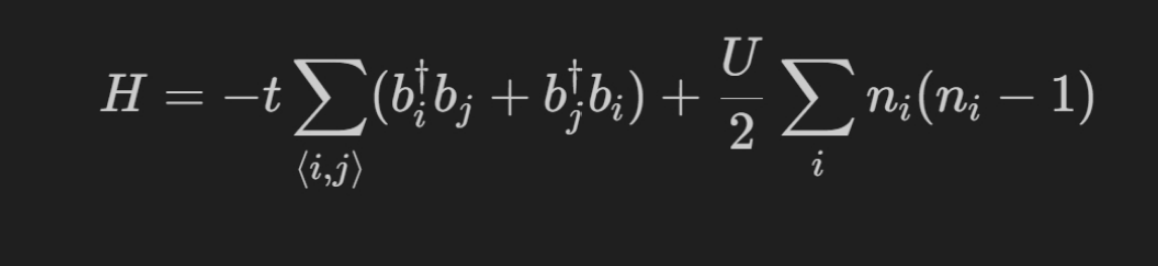


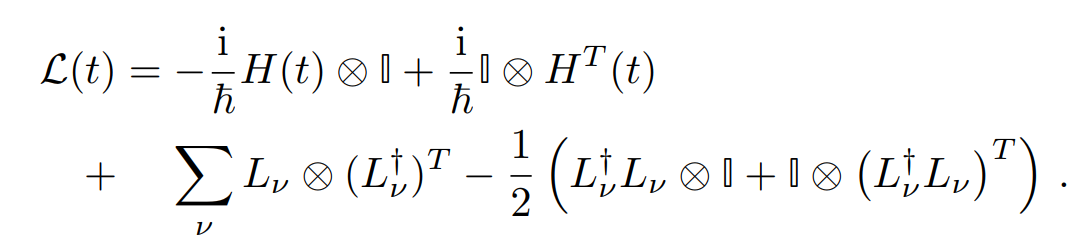

In [6]:
def Liouville(t, U, J, L, Lx, Ly):
    creation_op, annihilation_op, number_op = ptn.bosonic_operators()
    
    conversion_dict = {
        "b^dagger": creation_op,
        "b": annihilation_op,
        "I2": np.eye(2)
    }
    
    conversion_dict.update({
        "it * b^dagger": t*1j * creation_op,
        "it * b": t*1j * annihilation_op,
        "-iU * n * (n - 1)": -U*1j * number_op @ (number_op - np.eye(2))
    })
    
    terms = []
    
    # Hopping terms
    for x in range(Lx):
        for y in range(Ly):
            current_site = f"Site({x},{y})"
            
            # Horizontal connections
            if x < Lx - 1:
                right_neighbor = f"Site({x+1},{y})"
                terms.append(ptn.TensorProduct({current_site: "it * b^dagger", right_neighbor: "b"}))
                terms.append(ptn.TensorProduct({current_site: "it * b", right_neighbor: "b^dagger"}))
            
            # Vertical connections
            if y < Ly - 1:
                up_neighbor = f"Site({x},{y+1})"
                terms.append(ptn.TensorProduct({current_site: "it * b^dagger", up_neighbor: "b"}))
                terms.append(ptn.TensorProduct({current_site: "it * b", up_neighbor: "b^dagger"}))
    
    # On-site interaction terms
    for x in range(Lx):
        for y in range(Ly):
            current_site = f"Site({x},{y})"
            terms.append(ptn.TensorProduct({current_site: "-iU * n * (n - 1)"}))
    
    H1 = ptn.Hamiltonian(terms, conversion_dict)
    
    conversion_dict = {
        "b^dagger.T": creation_op.T,
        "b.T": annihilation_op.T,
        "I2": np.eye(2)
    }
    
    conversion_dict.update({
        "-it * b^dagger.T": -t*1j * creation_op.T,
        "-it * b.T": -t*1j * annihilation_op.T,
        "iU * n * (n - 1).T": (U*1j * number_op @ (number_op - np.eye(2))).T
    })
    
    terms = []
    
    # Hopping terms
    for x in range(Lx):
        for y in range(Ly):
            current_site = f"Node({x},{y})"
            
            # Horizontal connections
            if x < Lx - 1:
                right_neighbor = f"Node({x+1},{y})"
                terms.append(ptn.TensorProduct({current_site: "-it * b^dagger.T", right_neighbor: "b.T"}))
                terms.append(ptn.TensorProduct({current_site: "-it * b.T", right_neighbor: "b^dagger.T"}))
            
            # Vertical connections
            if y < Ly - 1:
                up_neighbor = f"Node({x},{y+1})"
                terms.append(ptn.TensorProduct({current_site: "-it * b^dagger.T", up_neighbor: "b.T"}))
                terms.append(ptn.TensorProduct({current_site: "-it * b.T", up_neighbor: "b^dagger.T"}))
    
    # On-site interaction terms
    for x in range(Lx):
        for y in range(Ly):
            current_site = f"Node({x},{y})"
            terms.append(ptn.TensorProduct({current_site: "iU * n * (n - 1).T"}))    

    H2 = ptn.Hamiltonian(terms, conversion_dict)
    H1.__add__(H2)

    
    conversion_dict = {
    "L": J*L,
    "L^dagger.T": J*L.conj(),
    "-1/2 (L^dagger @ L) ": -1/2 * J**2 *  L.conj().T @ L,
    "-1/2 (L^dagger @ L).T":-1/2 * J**2 * (L.conj().T @ L).T}

    terms = []
    for x in range(Lx):
        for y in range(Ly):
            out_site = f"Node({x},{y})"
            in_site = f"Site({x},{y})"
            terms.append(ptn.TensorProduct({in_site: "L"}))
            terms.append(ptn.TensorProduct({out_site: "L^dagger.T"}))
            terms.append(ptn.TensorProduct({in_site: "-1/2 (L^dagger @ L) "}))
            terms.append(ptn.TensorProduct({out_site: "-1/2 (L^dagger @ L).T"}))

    H3 = ptn.Hamiltonian(terms, conversion_dict)
    H1.__add__(H3)
    return H1

In [7]:
def Unitary(t, U, Lx, Ly):
    creation_op, annihilation_op, number_op = ptn.bosonic_operators()
    
    conversion_dict = {
        "b^dagger": creation_op,
        "b": annihilation_op,
        "I2": np.eye(2)
    }
    
    conversion_dict.update({
        "it * b^dagger": t * 1.0j* creation_op,
        "it * b": t* 1.0j * annihilation_op,
        "-iU * n * (n - 1)": -U* 1.0j * number_op @ (number_op - np.eye(2))
    })
    
    terms = []
    
    # Hopping terms
    for x in range(Lx):
        for y in range(Ly):
            current_site = f"Site({x},{y})"
            
            # Horizontal connections
            if x < Lx - 1:
                right_neighbor = f"Site({x+1},{y})"
                terms.append(ptn.TensorProduct({current_site: "it * b^dagger", right_neighbor: "b"}))
                terms.append(ptn.TensorProduct({current_site: "it * b", right_neighbor: "b^dagger"}))
            
            # Vertical connections
            if y < Ly - 1:
                up_neighbor = f"Site({x},{y+1})"
                terms.append(ptn.TensorProduct({current_site: "it * b^dagger", up_neighbor: "b"}))
                terms.append(ptn.TensorProduct({current_site: "it * b", up_neighbor: "b^dagger"}))
    
    # On-site interaction terms
    for x in range(Lx):
        for y in range(Ly):
            current_site = f"Site({x},{y})"
            terms.append(ptn.TensorProduct({current_site: "-iU * n * (n - 1)"}))
    
    H1 = ptn.Hamiltonian(terms, conversion_dict)
    
    conversion_dict = {
        "b^dagger.T": creation_op.T,
        "b.T": annihilation_op.T,
        "I2": np.eye(2)
    }
    
    conversion_dict.update({
        "-it * b^dagger.T": -t* 1.0j * creation_op.T,
        "-it * b.T": -t* 1.0j * annihilation_op.T,
        "iU * n * (n - 1).T": (U* 1.0j* number_op @ (number_op - np.eye(2))).T
    })
    
    terms = []
    
    # Hopping terms
    for x in range(Lx):
        for y in range(Ly):
            current_site = f"Node({x},{y})"
            
            # Horizontal connections
            if x < Lx - 1:
                right_neighbor = f"Node({x+1},{y})"
                terms.append(ptn.TensorProduct({current_site: "-it * b^dagger.T", right_neighbor: "b.T"}))
                terms.append(ptn.TensorProduct({current_site: "-it * b.T", right_neighbor: "b^dagger.T"}))
            
            # Vertical connections
            if y < Ly - 1:
                up_neighbor = f"Node({x},{y+1})"
                terms.append(ptn.TensorProduct({current_site: "-it * b^dagger.T", up_neighbor: "b.T"}))
                terms.append(ptn.TensorProduct({current_site: "-it * b.T", up_neighbor: "b^dagger.T"}))
    
    # On-site interaction terms
    for x in range(Lx):
        for y in range(Ly):
            current_site = f"Node({x},{y})"
            terms.append(ptn.TensorProduct({current_site: "iU * n * (n - 1).T"}))    

    H2 = ptn.Hamiltonian(terms, conversion_dict)
    H1.__add__(H2)
    return H1

In [8]:
def BoseHubbard_ham(t, U, Lx, Ly):
    creation_op, annihilation_op, number_op = ptn.bosonic_operators()
    
    conversion_dict = {
        "b^dagger": creation_op,
        "b": annihilation_op,
        "I2": np.eye(2)
    }
    
    conversion_dict.update({
        "-t * b^dagger": -t * creation_op,
        "-t * b": -t * annihilation_op,
        "U * n * (n - 1)": U * number_op @ (number_op - np.eye(2))
    })
    
    terms = []
    
    # Hopping terms
    for x in range(Lx):
        for y in range(Ly):
            current_site = f"Site({x},{y})"
            
            # Horizontal connections
            if x < Lx - 1:
                right_neighbor = f"Site({x+1},{y})"
                terms.append(ptn.TensorProduct({current_site: "-t * b^dagger", right_neighbor: "b"}))
                terms.append(ptn.TensorProduct({current_site: "-t * b", right_neighbor: "b^dagger"}))
            
            # Vertical connections
            if y < Ly - 1:
                up_neighbor = f"Site({x},{y+1})"
                terms.append(ptn.TensorProduct({current_site: "-t * b^dagger", up_neighbor: "b"}))
                terms.append(ptn.TensorProduct({current_site: "-t * b", up_neighbor: "b^dagger"}))
    
    # On-site interaction terms
    for x in range(Lx):
        for y in range(Ly):
            current_site = f"Site({x},{y})"
            terms.append(ptn.TensorProduct({current_site: "U * n * (n - 1)"}))
    
    return ptn.Hamiltonian(terms, conversion_dict)

def BoseHubbard_ham_tp(t, U, Lx, Ly):
    creation_op, annihilation_op, number_op = ptn.bosonic_operators()
    
    conversion_dict = {
        "b^dagger": creation_op,
        "b": annihilation_op,
        "I2": np.eye(2)
    }
    
    conversion_dict.update({
        "-t * b^dagger": -t * creation_op,
        "-t * b": -t * annihilation_op,
        "U * n * (n - 1)": U * number_op @ (number_op - np.eye(2))
    })
    
    terms = []
    
    # Hopping terms
    for x in range(Lx):
        for y in range(Ly):
            current_site = f"Site({x},{y})"
            
            # Horizontal connections
            if x < Lx - 1:
                right_neighbor = f"Site({x+1},{y})"
                terms.append(ptn.TensorProduct({current_site:  -t * creation_op, right_neighbor: annihilation_op}))
                terms.append(ptn.TensorProduct({current_site: -t * annihilation_op, right_neighbor: creation_op}))
            
            # Vertical connections
            if y < Ly - 1:
                up_neighbor = f"Site({x},{y+1})"
                terms.append(ptn.TensorProduct({current_site:  -t * creation_op, up_neighbor: annihilation_op}))
                terms.append(ptn.TensorProduct({current_site: -t * annihilation_op, up_neighbor: creation_op}))
    
    # On-site interaction terms
    for x in range(Lx):
        for y in range(Ly):
            current_site = f"Site({x},{y})"
            terms.append(ptn.TensorProduct({current_site: U * number_op @ (number_op - np.eye(2))}))
    
    return terms

In [9]:
def exchange_bra_ket_tensors(ttn):
    state = deepcopy(ttn)
    ptn.adjust_bra_to_ket(state)
    for ket_id in list(state.nodes.keys())[:(len(state.nodes.keys())//2)]:
        i, j = ket_id.replace('Site(', '').replace(')', '').split(',')
        bra_id = f"Node({i},{j})"
        T1 = state.tensors[bra_id]
        T2 = state.tensors[ket_id]
        state.tensors[ket_id] = T1
        state.nodes[ket_id].link_tensor(T1)
        state.tensors[bra_id] = T2
        state.nodes[bra_id].link_tensor(T2)
    return state

def substitute_out_or_in_legs_of_ttn_with_identity(state, out_or_in , bond_dim=2):
    ttn = deepcopy(state)
    if out_or_in == "Out":
       for node_id in list(ttn.nodes.keys())[(len(ttn.nodes.keys())//2):]:
        n = ttn.tensors[node_id].ndim - 1
        T = np.reshape(np.array([[1,0]]), (n*(1,) + (2,)))
        T = np.pad(T, n*((0, bond_dim-1),) + ((0, 0),))
        ttn.tensors[node_id] = T
        ttn.nodes[node_id].link_tensor(T)   
    if out_or_in == "In":
        for node_id in list(ttn.nodes.keys())[:len(ttn.nodes.keys())//2]:
            n = ttn.tensors[node_id].ndim
            T = ttn.tensors[node_id]
            T = np.reshape(np.array([[1,0]]), (n*(1,) + (2,)))
            T = np.pad(T, n*((0, bond_dim-1),) + ((0, 0),))
            ttn.tensors[node_id] = T
            ttn.nodes[node_id].link_tensor(T)        
    return ttn

#ttn = ptn.original_form(tdvp_ex1.state , tdvp_ex1.two_neighbour_form_dict)
#bond_dim = ttn.bond_dim("Site(0,0)", "Node(0,0)")
#ket = substitute_out_or_in_legs_of_ttn_with_identity(ttn, "Out",  bond_dim)
#op_ket = ptn.contract_ttno_with_ttn(H, ket)
#bra = exchange_bra_ket_tensors(ttn)
#bra = substitute_out_or_in_legs_of_ttn_with_identity(bra, "Out" , bond_dim)
#result = ptn.contract_two_ttns(bra, op_ket)


In [10]:
# TTNO : Hamiltonian acting on in_legs
H1 = BoseHubbard_ham(0.4, 0.5, 4, 4)
H1 = H1.pad_with_identities(ttn, symbolic= True)
H = ptn.TTNO.from_hamiltonian(H1, ttn)

# TTNO : Liouville operator 
L = np.array([[0, 1], [0, 0]])
J = 1
H1 = Liouville(0.4, 0.5, J, L, 4, 4)
H1 = H1.pad_with_identities(ttn , symbolic= True)
L_fancy = ptn.TTNO.from_hamiltonian(H1, ttn)

# TTNO : Unitary operator
H1 = Unitary(0.4, 0.5, 4, 4)
H1 = H1.pad_with_identities(ttn, symbolic= True)
U = ptn.TTNO.from_hamiltonian(H1, ttn)

In [11]:
#U = ptn.adjust_ttno_structure_to_ttn(U , ttn)
#ttn , dict1 = ptn.max_two_neighbour_form(ttn)
#U , dict2 = ptn.max_two_neighbour_form(U , dict1)

In [14]:
# Config : Lindblad = True
# time_evolve with exponent = hamiltonian * time_difference
# evaluate_operator with operator_expectation_value_Lindblad(operator)


tdvp_ex1 = ptn.SecondOrderOneSiteTDVP(initial_state = ttn,
                                     hamiltonian = L_fancy,
                                     time_step_size = 0.01,
                                     final_time = 0.49,
                                     operators = H,
                                     num_vecs = 3,
                                     tau = 1e-2,
                                     SVDParameters = ptn.SVDParameters(max_bond_dim = 24 , rel_tol= 1e-3 , total_tol = -np.inf),
                                     expansion_steps = 5,
                                     initial_tol= 1e-27,
                                     tol_step= 1e1,
                                     max_bond= 20,
                                     KrylovBasisMode = ptn.KrylovBasisMode.apply_1st_order_expansion,
                                     config = ptn.TTNTimeEvolutionConfig(record_bond_dim=True,
                                                                         Lindblad = True) )

In [13]:
c

NameError: name 'c' is not defined

In [ ]:
tdvp_ex1.state = ptn.expand_subspace(tdvp_ex1.state, tdvp_ex1.hamiltonian, 
                                     tdvp_ex1.num_vecs, tdvp_ex1.tau,
                                     tdvp_ex1.SVDParameters, 1e-1, tdvp_ex1.KrylovBasisMode)

In [ ]:
tdvp_ex1.state.max_bond_dim()

1

In [ ]:
I = ptn.TTNO.Identity(ttn)

In [ ]:
ttn.operator_expectation_value_Lindblad(I) 

array(65536.+0.j)

In [ ]:
tdvp_ex1.evaluate_operator(I)

NameError: name 'I' is not defined

In [ ]:
tdvp_ex1.run_ex(evaluation_time=5)

times = tdvp_ex1.times()
tdvp_results_ex1 = tdvp_ex1.operator_results()[0]

100%|██████████| 50/50 [11:55<00:00, 14.32s/it]


In [ ]:
tdvp_ex1.bond_dims

{('Site(0,0)', 'Site(0,1)'): [1, 2, 7, 14, 14, 14, 14, 14, 14, 14],
 ('Site(0,1)', 'Site(1,1)'): [1, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 ('Site(0,1)', 'Site(0,2)'): [1, 2, 7, 13, 13, 13, 13, 13, 13, 13],
 ('Site(0,2)', 'Site(1,2)'): [1, 2, 4, 4, 4, 4, 4, 4, 4, 4],
 ('Site(1,2)', 'Site(1,3)'): [1, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 ('Site(0,2)', 'Site(0,3)'): [1, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 ('Site(0,0)', 'Site(1,0)'): [1, 2, 4, 9, 9, 9, 9, 9, 9, 9],
 ('Site(1,0)', 'Site(2,0)'): [1, 2, 4, 8, 8, 8, 8, 8, 8, 8],
 ('Site(2,0)', 'Site(3,0)'): [1, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 ('Site(2,0)', 'Site(2,1)'): [1, 2, 6, 11, 11, 11, 11, 11, 11, 11],
 ('Site(2,1)', 'Site(3,1)'): [1, 2, 4, 9, 9, 9, 9, 9, 9, 9],
 ('Site(3,1)', 'Site(3,2)'): [1, 2, 4, 7, 7, 7, 7, 7, 7, 7],
 ('Site(3,2)', 'Site(2,2)'): [1, 2, 4, 4, 4, 4, 4, 4, 4, 4],
 ('Site(2,2)', 'Site(2,3)'): [1, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 ('Site(3,2)', 'Site(3,3)'): [1, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 ('Site(0,0)', 'Node(0,0)'): [1, 2, 6, 36, 36, 36, 36, 36, 36, 3

In [ ]:
save_list(tdvp_results_ex1, "46-41")

List saved to results/46-41


In [ ]:
tdvp_ex1.state.max_bond_dim()

46

In [ ]:
c

NameError: name 'c' is not defined

In [ ]:
tdvp_ex2.run_ex(evaluation_time=2)

times = tdvp_ex2.times()
tdvp_results_ex1 = tdvp_ex2.operator_results(realise=True)[0]

In [ ]:
save_list(tdvp_results_ex1, "52_...")

List saved to results/52-16


In [ ]:
tdvp_results_ex1 = tdvp_ex1.operator_results(realise=True)[0]

In [ ]:
state = ptn.original_form(tdvp_ex1.state , tdvp_ex1.two_neighbour_form_dict)

In [ ]:
state.max_bond_dim() 

41

In [ ]:
tdvp_results_ex1

array([-4.8       +0.00000000e+00j, -4.8       +3.64121130e-34j,
       -4.8       +5.17593673e-34j, -4.8       +9.32872317e-34j,
       -4.8       +1.61898486e-33j, -4.79843852+9.41808888e-16j,
       -4.79554902+5.64473187e-16j, -4.79297612+9.39347626e-16j,
       -4.79072657+5.62569119e-16j, -4.78880761+1.31103023e-15j,
       -4.78589749-1.26412764e-07j, -4.78238997-1.90675138e-07j,
       -4.7793392 -2.33776627e-07j, -4.77678136-2.67019473e-07j,
       -4.77474774-2.94488657e-07j, -4.77277123-3.03800946e-07j,
       -4.77048252-2.98883320e-07j, -4.76827541-2.97224361e-07j,
       -4.76664203-2.94308087e-07j, -4.76560211-2.91698477e-07j,
       -4.76441088-9.79310175e-07j, -4.76235566-1.22875188e-07j,
       -4.76050498+5.86483992e-07j, -4.75919579+1.29798101e-06j,
       -4.75846185+2.02498957e-06j, -4.75833857+2.76911445e-06j,
       -4.75886595+3.53028447e-06j, -4.76008968+4.30749812e-06j,
       -4.76206217+5.09874683e-06j, -4.76484346+5.90081248e-06j,
       -4.76850236+6.7089

c:\Users\edpou\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\edpou\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


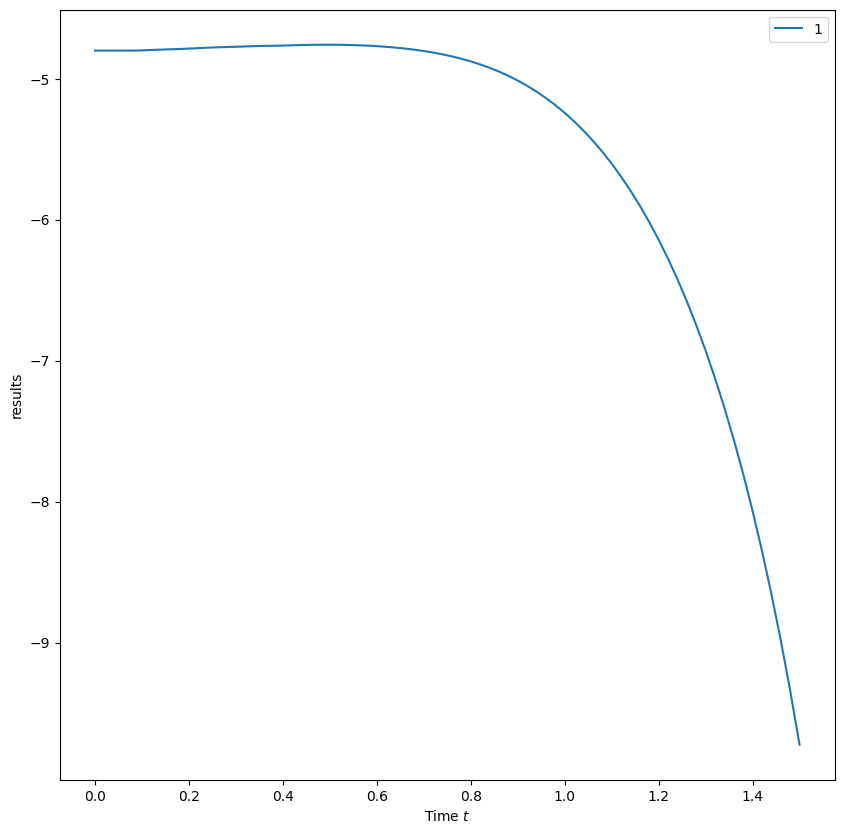

In [ ]:
import matplotlib.pyplot as plt

fig1, axs1 = plt.subplots(1, 1, sharex=True, figsize=(10,10))


#axs1.plot(times, load_list("41-18") , label='1')
#axs1.plot(times, tdvp_results_ex1 , label='3')
axs1.plot(times, tdvp_results_ex1 , label='1')

axs1.set_xlabel("Time $t$")
axs1.set_ylabel("results")  
axs1.legend()

In [ ]:
import matplotlib.pyplot as plt

fig1, axs1 = plt.subplots(1, 1, sharex=True, figsize=(10,10))


axs1.plot(times, tdvp_results_ex1 , label='2 ')
#axs1.plot(times, tdvp_results_ex2 , label='20')
#axs1.plot(times, tdvp_results_ex3 , label='5')
#axs1.plot(times, tdvp_results_ex4 , label='1')


axs1.set_xlabel("Time $t$")
axs1.set_ylabel("results")  
axs1.legend()

In [ ]:
tdvp_ex1.two_neighbour_form_dict

{'Site(0,0)': 'Node(0,0)',
 'Site(0,1)': 'Site(1,1)',
 'Site(0,2)': 'Site(1,2)',
 'Site(2,0)': 'Site(3,0)',
 'Site(3,2)': 'Site(2,2)',
 'Node(0,0)': 'Node(1,0)',
 'Node(0,1)': 'Node(1,1)',
 'Node(0,2)': 'Node(1,2)',
 'Node(2,0)': 'Node(2,1)',
 'Node(3,2)': 'Node(2,2)'}

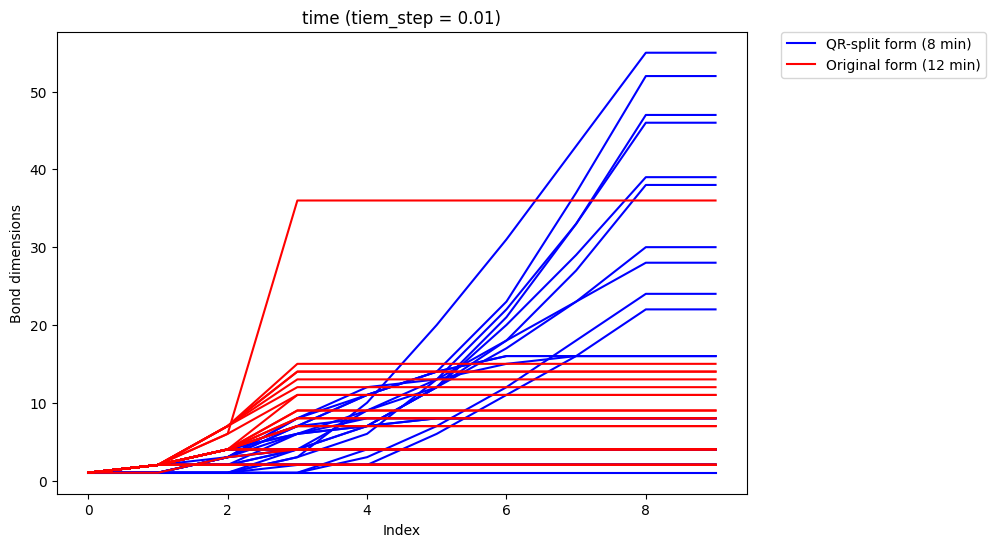

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

for key, values in tdvp_ex1.bond_dims.items():
    x = list(range(len(values)))
    ax.plot(x, values, color='blue')

blue_patch = plt.Line2D([0], [0], color='blue', label='QR-split form (8 min)')

ax.set_xlabel('Index')
ax.set_ylabel('Bond dimensions')
ax.set_title('time (tiem_step = 0.01)')


plt.show()
